In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# number of rows and columns
gold_data.shape


(2290, 6)

In [4]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Here the 25%,50%,75% show the resective percentage of entire data that is less than the corresponding value.

In [7]:
correlation = gold_data.corr()

correlation: dependency of one attribute with the other.
1.positive 
2.negative


<AxesSubplot:>

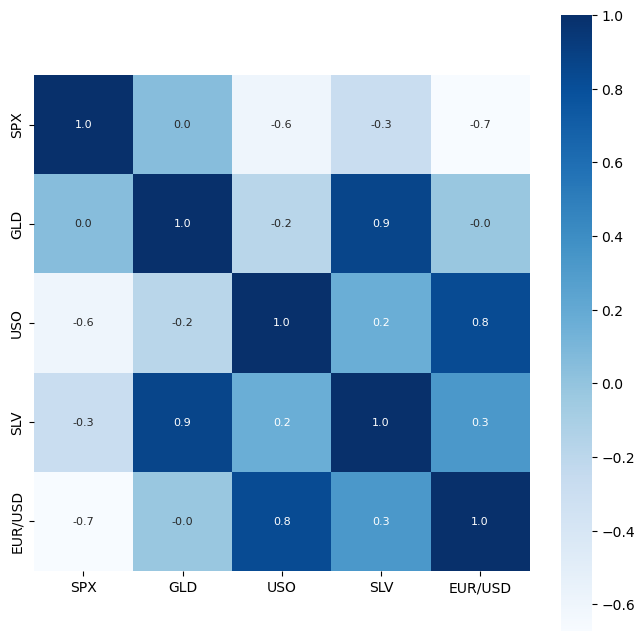

In [8]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

dark  = +ve correlation                               
light = -ve correlation

c:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

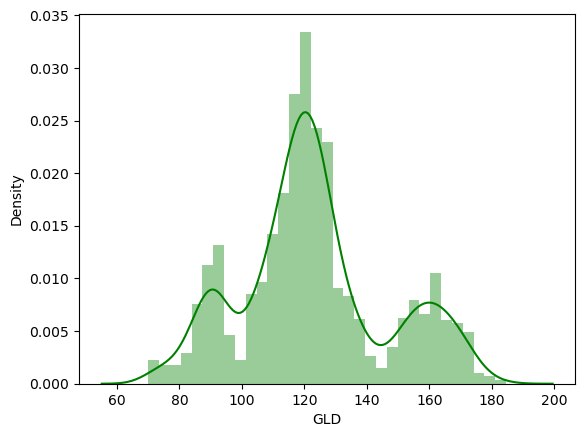

In [9]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [10]:
#splitting the features and targets.
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
#splitting data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [20]:
#using Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [22]:
test_data_prediction=regressor.predict(X_test)
train_data_prediction=regressor.predict(X_train)

In [23]:
print(test_data_prediction)

[168.72029968  82.12809973 115.98389998 127.40590083 120.75970129
 154.82159772 150.23489922 126.09960056 117.31899872 125.87450111
 116.71610088 171.29910079 141.62479801 167.82209838 115.06100021
 117.38920044 137.47360298 169.83990028 159.10810355 160.32969841
 155.08770056 125.32630049 176.05050014 157.04830312 125.16630047
  93.74469977  76.87400001 120.66849997 119.18909965 167.44130044
  88.10430037 125.38719975  91.24290117 117.84700002 121.0218985
 136.14660116 115.26960107 115.45120082 146.55310017 107.32220102
 104.20090236  86.99019781 126.57749994 117.75520019 153.62549931
 119.6893003  108.48020039 108.06539826  93.21450059 127.16529741
  75.04049996 113.69249935 121.20809988 111.15239898 118.89129891
 120.75289937 159.10549999 166.12700136 147.10829681  85.83419864
  94.12220029  86.83789908  90.59510023 118.91090098 126.39010071
 127.52689972 169.34909998 122.36319946 117.30709885  98.77380041
 167.93110057 143.36959798 132.30700213 121.24550237 121.25619961
 119.594800

In [24]:
#error for train data
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared error : ", error_score)

#error for test_data
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9985395061448753
R squared error :  0.9889577359764218


In [26]:
Y_test = list(Y_test)

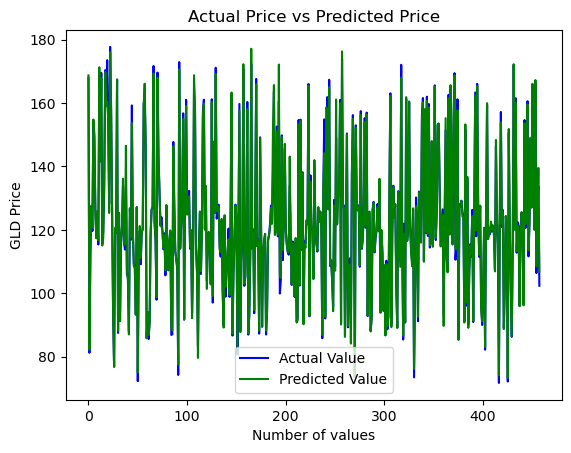

In [27]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()